# Homework I

Gonçalo Bárias (ist1103124) & Raquel Braunschweig (ist1102624)

## I. Pen and Paper [11v]

**Consider the partially learnt decision tree from the dataset 𝐷. 𝐷 is described by four input variables –
one numeric with values in [0,1] and 3 categorical – and a target variable with three classes.**

### 1) [5v] 

**Complete the given decision tree using Information gain with Shannon entropy (log2). Consider that:**

**i) A minimum of 4 observations is required to split an internal node;**

**ii) Decisions by ascending alphabetic order should be placed in case of ties.**

### 2) [2.5v] 

**Draw the training confusion matrix for the learnt decision tree.**

<table>
  <tr>
    <td colspan="2" rowspan="2" style="border-top: none; border-left: none;"></td>
    <th colspan="2">True</th>
    <td rowspan="2" style="border-top: none; border-right: none;"></td>
  </tr>
  <tr>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <th rowspan="2">Predicted</th>
    <th>Positive</th>
    <td>A</td>
    <td>B</td>
    <td>C</td>
  </tr>
  <tr>
    <th>Negative</th>
    <td>D</td>
    <td>E</td>
    <td>F</td>
  </tr>
  <tr>
    <th colspan="2" style="border-left: none; border-bottom: none;"></th>
    <td>G</td>
    <td>H</td>
    <td>I</td>
  </tr>
</table>

### 3) [1.5v] 

**Identify which class has the lowest training F1 score.**

### 4) [1v] 

**Considering y2 to be ordinal, assess if y1 and y2 are correlated using the Spearman coefficient.**

### 5) [1v] 

**Draw the class-conditional relative histograms of y1 using 5 equally spaced bins in [0,1]. Find the root split using the discriminant rules from these empirical distributions.**

## II. Programming [9v]

**Consider the `column_diagnosis.arff` data available at the homework tab, comprising 6 biomechanical features to classify 310 orthopaedic patients into 3 classes (`normal`, `disk hernia`, `spondilolysthesis`).**

### 1) [1.5v]

**Apply `f_classif` from `sklearn` to assess the discriminative power of the input variables.
Identify the input variable with the highest and lowest discriminative power.
Plot the class-conditional probability density functions of these two input variables.**

In [53]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif


In [54]:
# Read the ARFF file and prepare data
data = loadarff("./data/column_diagnosis.arff")
df = pd.DataFrame(data[0])
df["class"] = df["class"].str.decode("utf-8")
X, y = df.drop("class", axis=1), df["class"]

In [55]:
# Apply f_classif
f_scores, p_values = f_classif(X, y)

# Obtains the variables with the highest and lowest discriminative power.
highest_discriminative_power_idx = np.argmax(f_scores)
lowest_discriminative_power_idx = np.argmin(f_scores)

highest_discriminative_power_variable = X.columns[highest_discriminative_power_idx]
lowest_discriminative_power_variable = X.columns[lowest_discriminative_power_idx]

# Identifies the input variables requested
print(f"Highest discriminative power variable: {highest_discriminative_power_variable}")
print(f"Lowest discriminative power variable: {lowest_discriminative_power_variable}")

Highest discriminative power variable: degree_spondylolisthesis
Lowest discriminative power variable: pelvic_radius


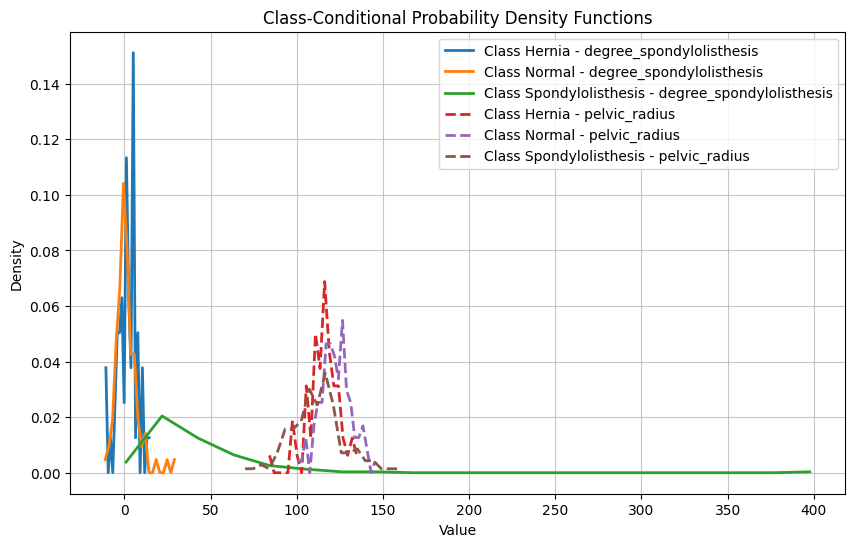

In [56]:
plt.figure(figsize=(10, 6))

# Plot for the highest discriminative power variable
for class_label in np.unique(y):
    class_data = X.loc[y == class_label, highest_discriminative_power_variable]
    density, bins = np.histogram(class_data, bins=20, density=True)
    plt.plot(bins[:-1], density, label=f'Class {class_label} - {highest_discriminative_power_variable}', linewidth=2)

# Plot for the lowest discriminative power variable
for class_label in np.unique(y):
    class_data = X.loc[y == class_label, lowest_discriminative_power_variable]
    density, bins = np.histogram(class_data, bins=20, density=True)
    plt.plot(bins[:-1], density, linestyle='--', label=f'Class {class_label} - {lowest_discriminative_power_variable}', linewidth=2)

plt.title(f'Class-Conditional Probability Density Functions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.7)
plt.savefig("./report/class_conditional_probability.svg")
plt.show()

### 2) [4v]

**Using a stratified 70-30 training-testing split with a fixed seed (`random_state=0`), assess in a
single plot both the training and testing accuracies of a decision tree with depth limits in
`{1,2,3,4,5,6,8,10}` and the remaining parameters as default.**

***[Optional]* Note that split thresholding of numeric variables in decision trees is non-deterministic
in sklearn, hence you may opt to average the results using 10 runs per parameterization.**

In [151]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from scipy.io.arff import loadarff
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split

In [152]:
# Read the ARFF file and prepare data
data = loadarff("./data/column_diagnosis.arff")
df = pd.DataFrame(data[0])
df["class"] = df["class"].str.decode("utf-8")
X, y = df.drop("class", axis=1), df["class"]

In [153]:
DEPTH_LIMIT = [1, 2, 3, 4, 5, 6, 8, 10]
training_accuracy, test_accuracy = [], []

# Split the dataset into a testing set (30%) and a training set (70%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

for depth_limit in DEPTH_LIMIT:
    # Create and fit the decision tree classifier
    predictor = tree.DecisionTreeClassifier(max_depth=depth_limit, random_state=0)
    predictor.fit(X_train, y_train)

    # Use the decision tree to predict the outcome of the given observations
    y_train_pred = predictor.predict(X_train)
    y_test_pred = predictor.predict(X_test)

    # Get the accuracy of each test
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)

    training_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

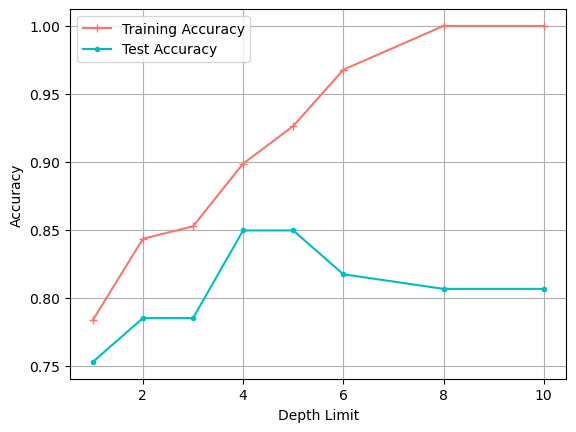

In [154]:
plt.plot(
    DEPTH_LIMIT,
    training_accuracy,
    label="Training Accuracy",
    marker="+",
    color="#f8766d",
)
plt.plot(
    DEPTH_LIMIT,
    test_accuracy,
    label="Test Accuracy",
    marker=".",
    color="#00bfc4"
)

plt.xlabel("Depth Limit")
plt.ylabel("Accuracy")

plt.legend()
plt.grid(True)
plt.savefig("./report/training_testing_accuracies.svg")
plt.show()

### 3) [1.5v]

**Comment on the results, including the generalization capacity across settings.**

### 4) [2v]

**To deploy the predictor, a healthcare team opted to learn a single decision tree
(`random_state=0`) using *all* available data as training data, and further ensuring that each leaf has
a minimum of 20 individuals in order to avoid overfitting risks.**

- **i. Plot the decision tree.**

In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
import graphviz
from scipy.io.arff import loadarff
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
# Read the ARFF file and prepare data
data = loadarff("./data/column_diagnosis.arff")
df = pd.DataFrame(data[0])
df["class"] = df["class"].str.decode("utf-8")
X, y = df.drop("class", axis=1), df["class"]

In [4]:
# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=20)
clf.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=20, random_state=0)

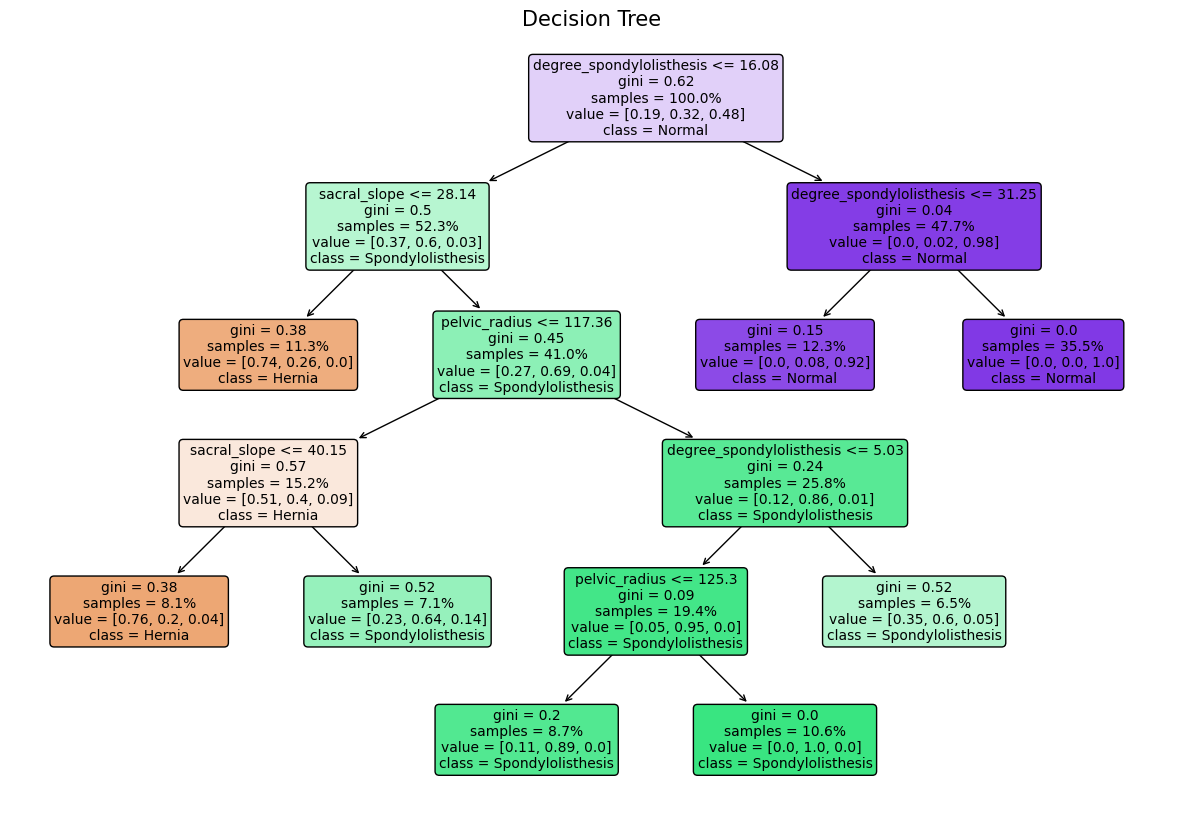

In [9]:
# Set style and plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=df["class"].unique(), 
          rounded=True, fontsize=10, proportion=True, precision=2)
plt.title("Decision Tree", fontsize=15)
plt.savefig("./report/decision_tree.svg")
plt.show()

- **ii. Characterize a hernia condition by identifying the hernia-conditional associations.**

Hernia-conditional Associations:
pelvic_incidence: nan
pelvic_tilt: nan
lumbar_lordosis_angle: nan
sacral_slope: nan
pelvic_radius: nan
degree_spondylolisthesis: nan
